# MIT 6.036 Spring 2019: Homework 4
This homework does not include provided Python code. Instead, we
encourage you to write your own code to help you answer some of these
problems, and/or test and debug the code components we do ask for.
Some of the problems below are simple enough that hand calculation
should be possible; your hand solutions can serve as test cases for
your code.  You may also find that including utilities written in
previous labs (like a `sd` or signed distance function) will be
helpful, as you build up additional functions and utilities for
calculation of margins, different loss functions, gradients, and other
functions needed for margin maximization and gradient descent.

## 1) Margin
When we train a classifier, it is desirable for the classifier to have a large margin with regard to the points in our data set, in the hope that this will make the classifier more robust to any new points we might see.

We have previously defined the margin of a single example (a single data point) with respect to a separator, but that does not directly indicate whether a separator will perform well on a large data set. Thus, we would like to find a score function $S$ for a separator  $(\theta,\theta_0)$ such that maximizing $S$ leads to a better separator.

Marge Inovera suggests that because big margins are good, we should maximize the sum of the margins. So, she defines:

$$ S_{sum}(\theta, \theta_0) = \sum_{i} \gamma(x^{(i)}, y^{(i)}, \theta, \theta_0) $$

Minnie Malle suggests that it would be better to just worry about the points closest to the margin, and defines:

$$ S_{min}(\theta, \theta_0) = \min_{i} \gamma(x^{(i)}, y^{(i)}, \theta, \theta_0) $$

Maxim Argent suggests:

$$ S_{max}(\theta, \theta_0) = \max_{i} \gamma(x^{(i)}, y^{(i)}, \theta, \theta_0) $$

Recall that the margin of a given point is defined as:

$$ \gamma(x, y, \theta, \theta_0) = \frac {y(\theta \cdot x + \theta_0)}{\lVert \theta \rVert} $$

Consider the following data, and two potential separators (red and blue).

```
data = np.array([[1, 2, 1, 2, 10, 10.3, 10.5, 10.7],
                 [1, 1, 2, 2,  2,  2,  2, 2]])
labels = np.array([[-1, -1, 1, 1, 1, 1, 1, 1]])
blue_th = np.array([[0, 1]]).T
blue_th0 = -1.5
red_th = np.array([[1, 0]]).T
red_th0 = -2.5
```

The situation is illustrated in the figure below.

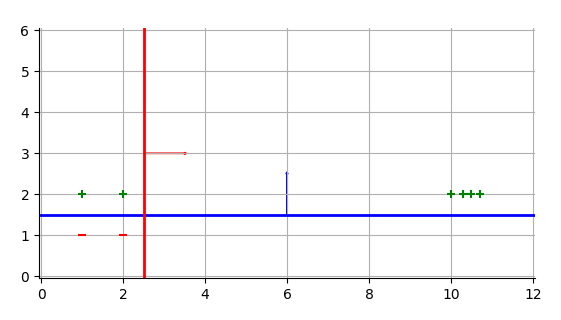

## 1A) 
What are the values of each score $ S_{sum}(\theta, \theta_0), \ S_{min}(\theta, \theta_0), \ S_{max}(\theta, \theta_0) $ on the red separator? Enter a Python list of three numbers.

$[31.5, -1.5, 8.2]$

## 1B) 
What are the values of each score $ S_{sum}(\theta, \theta_0), \ S_{min}(\theta, \theta_0), \ S_{max}(\theta, \theta_0) $ on the blue separator? Enter a Python list of three numbers.

$[4.0, 0.5, 0.5]$

## 1C) 
Which of these separators maximizes $ S_{sum} $?

Red.

## 1D) 
Which of these separators maximizes $ S_{min} $?

Blue.

## 1E) 
Which of these separators maximizes $ S_{max} $?

Red.

## 1F)
Which score function should we prefer if our goal is to find a separator that generalizes better to new data?

$S_{min}$

In [3]:
import numpy as np

def sd(x, theta, theta_0):
    return (theta.T@x + theta_0) / np.linalg.norm(theta)

def margin(x, y, theta, theta_0):
    return y*sd(x, theta, theta_0)

def sum_of_margins(x, y, theta, theta_0):
    return np.sum(margin(x, y, theta, theta_0))
    
def min_of_margins(x, y, theta, theta_0):
    return np.min(margin(x, y, theta, theta_0))
    
def max_of_margins(x, y, theta, theta_0):
    return np.max(margin(x, y, theta, theta_0))

data = np.array([[1, 2, 1, 2, 10, 10.3, 10.5, 10.7],
                 [1, 1, 2, 2,  2,  2,  2, 2]])
labels = np.array([[-1, -1, 1, 1, 1, 1, 1, 1]])
blue_th = np.array([[0, 1]]).T
blue_th0 = -1.5
red_th = np.array([[1, 0]]).T
red_th0 = -2.5

# 1A
score_functions = [sum_of_margins, min_of_margins, max_of_margins]
scores = []
for score_function in score_functions:
    scores += [score_function(data, labels, red_th, red_th0)]
print(scores)

# 1B
scores = []
for score_function in score_functions:
    scores += [score_function(data, labels, blue_th, blue_th0)]
print(scores)

[31.5, -1.5, 8.2]
[4.0, 0.5, 0.5]


## 2) What a loss
Based on the previous part, we've decided to try to find a linear separator $(\theta,\theta_0)$ that __maximizes__ the __minimum margin__ (the distance between the separator and the points that come closest to it.) We define the margin of a data set $(X,Y)$, with respect to a separator as:

$$ \gamma(X, Y, \theta, \theta_0) = \min_{i} \gamma(x^{(i)}, y^{(i)}, \theta, \theta_0) $$

As discussed in the [notes](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week4/margin_maximization/3), an approach to this problem is to specify a value $\gamma_{ref}$ for the margin of the data set, and then seek to find a linear separator that maximizes $\gamma_{ref}$.

## 2A)
We can think about a (not necessarily maximal) margin $\gamma_{ref}$ for the data set as a value such that:

For every point $x^{(i)}, y^{(i)}$, we have $\gamma(x^{(i)}, y^{(i)}, \theta, \theta_0) \geq \gamma_{ref}$

## 2B)
Suppose for our data set we find that the maximum $\gamma_{ref}$ across all linear separators is 0. Is our data linearly separable?

No.


## 2C)
For this subproblem, assume that $\gamma_{ref} \gt 0$ (i.e., the data is linearly separable). Note that in this case, the Perceptron algorithm is guaranteed to find a separator that correctly classifies all of the data points. What is the __largest minimum margin__ guaranteed by running the Perceptron algorithm on a data set that has a maximum margin equal to $\gamma_{ref} \gt 0$?

Some $\epsilon$ where $\epsilon \gt 0$

Now we want to improve on the (infinitesimally small) guaranteed margin of the Perceptron algorithm. We saw in the lecture that a powerful way of designing learning algorithms is to [describe them as optimization problems](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week4/margin_maximization/1), then use relatively general-purpose optimization strategies to solve them.

A typical form of the optimization problem is to minimize an objective that has the form:

$$ J(\theta, \theta_0) = \frac{1}{n} \sum_{i=1}^{n} L(x^{(i)}, y^{(i)}, \theta, \theta_0) + \lambda R(\theta, \theta_0) $$

where $L$ is a per-point loss function that characterizes how much error was made by the hypothesis $(\theta, \theta_0)$ on the point, and $R$ is a regularizer that describes some prior knowledge or general preference over hypotheses.

We first consider the objective of finding a maximum-margin separator using the format above, using the so-called "zero-infinity" loss, $L_{0, \infty}$:

$$ L_{0, \infty}(\gamma(x^{(i)}, y^{(i)}, \theta, \theta_0), \gamma_{ref}) = 
\begin{cases}
    \infty, & \text{if } \gamma(x, y, \theta, \theta_0) \lt \gamma_{ref} \\
    0, & \text{otherwise}
\end{cases} $$

## 2D)
For a linearly separable data set, positive $\lambda$ and positive $R$ given nonzero $\theta$ what is true about the __minimal__ value of $J_{0,\infty}$?

It is always finite and positive.

## 2E)
For a __non__ linearly separable data set, and positive $\lambda$ and $\gamma_{ref}$, what is true about the __minimal__ value of $J_{0,\infty}$?

It is infinite.


## 3) Simply inseparable
We would prefer a loss function that helps steer optimization toward a solution, in the case when the data is linearly separable. Furthermore, in real data sets it is relatively rare that the data is linearly separable, so our algorithm should be able to handle this case also and still work toward an optimal, though imperfect, linear separator. Instead of using $(0, \infty)$ loss, we should design a loss function that will let us "relax" the constraint that all of the points have margin bigger than $\gamma_{ref}$, while still encouraging large margins.

The hinge loss is one such more relaxed loss function; we will define it in a way that makes a connection to the problem we are facing:

$$ L_{h}(\frac{\gamma(x, y, \theta, \theta_0)}{\gamma_{ref}}) =
\begin{cases}
    1 - \frac{\gamma(x, y, \theta, \theta_0)}{\gamma_{ref}}, & \text{if } \gamma(x, y, \theta, \theta_0) \lt \gamma_{ref} \\
    0, & \text{otherwise}
\end{cases} $$

When the margin of the point is greater than or equal to $\gamma_{ref}$, we are happy and the loss is 0; while when the margin is less than $\gamma_{ref}$, we have a positive loss that increases the further away the margin is from $\gamma_{ref}$.

## 3A) 
Given this definition, if $\gamma_{ref}$ is positive what can we say about $L_{h}(\frac{\gamma(x, y, \theta, \theta_0)}{\gamma_{ref}})$, no matter what finite values $\theta$ and $\theta_0$ take on?

It is always >= 0.

Here is a separator and three points. The dotted lines represent the margins determined by $\gamma_{ref}$.

```
data = np.array([[1.1, 1, 4],[3.1, 1, 2]])
labels = np.array([[1, -1, -1]])
th = np.array([[1, 1]]).T
th0 = -4
```

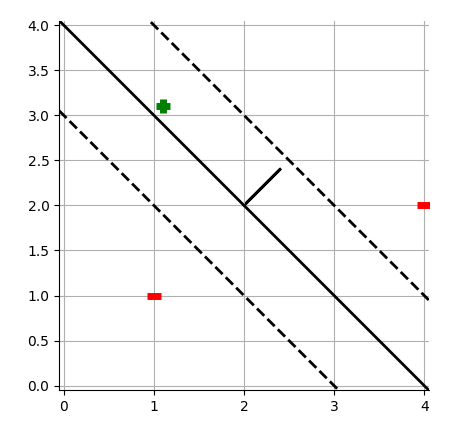

## 3B)
What is $ L_{h}(\frac{\gamma(x, y, \theta, \theta_0)}{\gamma_{ref}})$ for each point, where $\gamma_{ref} = \frac{\sqrt{2}}{2}$? Enter the values in the same order as the respective points are listed in data. You can do this computationally or by hand. Enter the three hinge loss values in order as a Python list of three numbers:

$[0.8, 0.,  3. ]$


In [10]:
# 3B
def hinge_losses(x, y, theta, theta_0, margin_ref):
    loss = np.vectorize(lambda x: 1 - (x/margin_ref) if x < margin_ref else 0)
    return loss(margin(x, y, theta, theta_0))

data = np.array([[1.1, 1, 4],[3.1, 1, 2]])
labels = np.array([[1, -1, -1]])
th = np.array([[1, 1]]).T
th0 = -4
margin_ref = (2**0.5)/2

print(hinge_losses(data, labels, th, th0, margin_ref))

[[0.8 0.  3. ]]


## 4) It hinges on the loss
Putting hinge loss and regularization together, we can look at regularized average hinge loss:

$$ \frac{1}{n} \sum_{i=1}^{n} L_{h}(\frac{\gamma(x^{(i)}, y^{(i)}, \theta, \theta_0}{\gamma_{ref}}) + \lambda \frac{1}{\gamma_{ref}^2} $$

We only need to minimize this over two parameters $\theta, \theta_0$, since the third parameter $\gamma_{ref}$ can be expressed as $\frac{1}{\lVert \theta \rVert}$, as they both represent the distance from the decision boundary to the margin boundary. Plugging in $\gamma_{ref} = \frac{1}{\lVert \theta \rVert}$ and also expanding $\gamma$, we arrive at the SVM (support vector machine) objective:

$$ J(\theta, \theta_0) = \frac{1}{n} \sum_{i=1}^{n} L_{h}(y^{(i)}(\theta^Tx^{(i)} + \theta_0)) +\lambda \lVert \theta \rVert ^2$$

## 4A)
If the data is linearly separable and we use the SVM objective, if we now let $\lambda = 0$ and find the minimizing values of $\theta, \theta_0$, what will happen?

The minimal objective value will be 0.

## 4B) 
Consider the following plots of separators. They are for $\lambda$ values of 0 and 0.001. Match each $\lambda$ to a plot. Enter a Python list with the values of $\lambda$ for the two graphs below.

$[0.001, 0]$

<div style="display:flex;"><img src="https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw04/lamb_A.png" style="width:50%;"><img src="https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw04/lamb_B.png" style="width:50%;"></div>

## 4C)
Consider the following three plots of separators. They are for $\lambda$ values of 0, 0.001, and 0.03. Match to the plot. Enter a Python list with the values of $\lambda$ for the three graphs below.

$[0.03, 0, 0.001]$

<div style="display:flex;"><img src="https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw04/bada_A.png" style="width:33%;"><img src="https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw04/bada_B.png" style="width:33%;"><img src="https://introml_oll.odl.mit.edu/cat-soop/_static/6.036/homework/hw04/bada_C.png" style="width:33%;"></div>



In [11]:
# 4B
print(np.linalg.norm(np.array([[-0.0737901], [2.40847205]])))
print(np.linalg.norm(np.array([[-0.23069578], [2.55735501]])))

# 4C
print(np.linalg.norm(np.array([[0.01280916], [-1.42043497]])))
print(np.linalg.norm(np.array([[0.45589866], [-4.50220738]])))
print(np.linalg.norm(np.array([[0.04828952], [-4.13159675]])))

2.409602165190182
2.567739315055543
1.4204927238739404
4.525230920153827
4.131878940912039


## 5) Linear Support Vector Machines
The training objective for the Support Vector Machine (with slack) can be seen as optimizing a balance between the average hinge loss over the examples and a regularization term that tries to keep $\theta$ small (or equivalently, increase the margin). This balance is set by the regularization parameter $\lambda$. Here we only consider the case without the offset parameter $\theta_0$  (setting it to zero) and rewrite the training objective as an average so that it is given by

$$
 \left[  \frac{1}{n} \sum_{i=1}^{n} L_{h}(y^{(i)}\theta \cdot x^{(i)}) \right] + \frac{\lambda}{2}\lVert \theta \rVert ^2 = \frac{1}{n} \sum_{i=1}^{n} \left[ L_{h}(y^{(i)}\theta \cdot x^{(i)}) + \frac{\lambda}{2}\lVert \theta \rVert ^2 \right]
$$



where $ L_{h}(y(\theta \cdot x)) = \max\left\{0,1-y(\theta \cdot x)\right\} $ is the hinge loss. (Note that we will also sometimes write the hinge loss as $ L_{h}(v) = \max\left\{0,1-v\right\} $. Now we can minimize the above overall objective function with the Pegasos algorithm that iteratively selects a training point at random and applies a gradient descent update rule based on the corresponding term inside the brackets on the right hand side.

In this problem we will optimize the training objective using a single training example, so that we can gain a better understanding of how the regularization parameter, $\lambda$, affects the result. To this end, we refer to the single training example as the feature vector and label pair, $(x, y)$. We will then try to find a $\theta$ that minimizes

$$ J_{\lambda}^1(\theta) \equiv  L_{h}(y(\theta \cdot x)) + \frac{\lambda}{2}\lVert \theta \rVert ^2 $$

In the next subparts, we will try to show that the $\theta$ minimizing $J_{\lambda}^1$, denoted $\hat{\theta}$ is necessarily of the form 

$$\hat{\theta} = \eta yx$$ 

for some real $\eta \gt 0$

In the expressions below, you can use `lambda` to stand for $\lambda$, `x` to stand for $x$, `transpose(x)` for transpose of an array, `norm(x)` for the length (norm) of a vector, `x@y` to indicate a matrix product of two arrays, and `x*y` for elementwise (or scalar) multiply.

## 5A) 
Consider first the case where the loss is positive: $L_{h}(y(\theta \cdot x)) \gt 0$. We can minimize $J_{\lambda}^1$ with respect to $\theta$ by computing a formula for its gradient with respect to $\theta$, and then solving for the $\theta$ for which the gradient is equal to 0. Let us denote that value as $\hat{\theta}$. Enter and expression for $\hat{\theta}$.

$$
\begin{align*}
    \hat{\theta} &= \frac{\partial J_{\lambda}^1}{\partial \theta} \\
    \hat{\theta} &= \frac{\partial }{\partial \theta} (1-y(\theta \cdot x)) + \frac{\partial}{\partial \theta} \frac{\lambda}{2} \lVert \theta \rVert ^2 \\
    \hat{\theta} &= -yx + 2 \frac{\lambda}{2} \theta \\
    \hat{\theta} &= -yx + 2 \lambda \theta
\end{align*}
$$

## 5B) 
Now find the smallest (in the norm sense) $\hat{\theta}$ for which $L_{h}(y(\theta \cdot x)) = 0$
Note: Be careful -- you cannot simply divide by a vector! Enter your answer as a Python expression.

$$
\begin{align*}
    0 &= 1-y(\theta \cdot x) \\
    1 &= y(\theta \cdot x) \\
    \frac{1}{y} &= \theta \cdot x \\
    y \cdot x &= \theta (x \cdot x) \\
    y \cdot x &= \theta \lVert x \rVert ^2 \\
    \theta &= \frac{xy}{\lVert x \rVert ^2}
\end{align*}
$$

## 5C) 
Let $\hat{\theta} = \hat{\theta}(\lambda)$ be the minimizer of $J_{\lambda}^1$. Is it possible to pick a value for $\lambda$ so that the training example $(x, y)$ wil be misclassified by $\hat{\theta}(\lambda)$? To answer this question, recall that a point is misclassified when $y(\theta \cdot x) \leq 0$. Use your result from part 5A where you found the $\hat{\theta}$ that minimizes $J_{\lambda}^1$ to write an expression for $y(\hat{\theta} \cdot x)$ in terms $x$, $y$ and $\lambda$.

$$ \frac{y^2}{\lambda}\lVert x \rVert ^2 $$

## 5D)
Under what conditions is $y(\hat{\theta} \cdot x) \leq 0$? Select all that are true.

$\lambda = \infty, x = 0$

## 5E) 
You will notice that if $y(\hat{\theta} \cdot x) \leq 0$, then $\hat{\theta}$ will misclassify $x$. The above result shows that our optimal classifier $\hat{\theta}$ won't misclassify (except in edge cases); however, we might still be concerned about correctly classified points that are "too close" to the separator, and thereby increase our regularized loss function.

Suppose we have a linear classifier described by $\theta$. We say a correctly classified datapoint $\hat{x}, \hat{y}$ is on the margin boundary of the classifier if 

$$\hat{y}(\theta \cdot \hat{x}) = 1$$

When a classifier is determined by minimizing a regularized loss function with a single training example, like $J_{\lambda}^1$ above, too much regularization can result in a classifier that puts a correctly classified training point _inside_ the margin, and thus incur hinge loss. That is, if we have a single training example $(x,y)$ and regularize with a $\lambda$ that is too large, we may discover that $y(\hat{\theta} \cdot x) \lt 1$. Fortunately, for this single training example case, we can ensure that $\lambda$ is not too large.
Write an expression for the maximum value of $\lambda$, in terms of $x$ and $y$, that ensures that the $(x,y)$ example is NOT inside the margin:

$$
\begin{align*}
    1 & \le \frac{y^2 \lVert x \rVert ^2}{\lambda} \\
    \lambda & \le y^2 \lVert x \rVert ^2
\end{align*}
$$


So, where are we? We now have a good objective function, the SVM objective, that will strive to correctly classify data points, but also seek to maximize the margin (minimize the norm of $\theta$), given a judicious choice of $\lambda$. This objective function can be used in either batch optimization (calculating average losses across the whole data set), or on a data point by data point basis. This gives us powerful flexibility in optimizing (minimizing) this objective function using gradient descent, which we will consider next.

## 6) Implementing gradient descent
In this section we will implement generic versions of gradient descent and apply these to the SVM objective.

<b>Note: </b> If you need a refresher on gradient descent,
you may want to reference
<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week4/gradient_descent/2">this week's notes</a>.

### 6.1) Implementing Gradient Descent
We want to find the $x$ that minimizes the value of the *objective
function* $f(x)$, for an arbitrary scalar function $f$.  The function
$f$ will be implemented as a Python function of one argument, that
will be a numpy column vector.  For efficiency, we will work with
Python functions that return not just the value of $f$ at $f(x)$ but
also return the gradient vector at $x$, that is, $\nabla_x f(x)$.

We will now implement a generic gradient descent function, `gd`, that
has the following input arguments:

* `f`: a function whose input is an `x`, a column vector, and
  returns a scalar.
* `df`: a function whose input is an `x`, a column vector, and
  returns a column vector representing the gradient of `f` at `x`.
* `x0`: an initial value of $x$, `x0`, which is a column vector.
* `step_size_fn`: a function that is given the iteration index (an
  integer) and returns a step size.
* `max_iter`: the number of iterations to perform

Our function `gd` returns a tuple:

* `x`: the value at the final step
* `fs`: the list of values of `f` found during all the iterations (including `f(x0)`)
* `xs`: the list of values of `x` found during all the iterations (including `x0`)

**Hint:** This is a short function!

**Hint 2:** If you do `temp_x = x` where `x` is a vector
(numpy array), then `temp_x` is just another name for the same vector
as `x` and changing an entry in one will change an entry in the other.
You should either use `x.copy()` or remember to change entries back after modification.

Some utilities you may find useful are included below.

In [12]:
def rv(value_list):
    return np.array([value_list])

def cv(value_list):
    return np.transpose(rv(value_list))

def f1(x):
    return float((2 * x + 3)**2)

def df1(x):
    return 2 * 2 * (2 * x + 3)

def f2(v):
    x = float(v[0]); y = float(v[1])
    return (x - 2.) * (x - 3.) * (x + 3.) * (x + 1.) + (x + y -1)**2

def df2(v):
    x = float(v[0]); y = float(v[1])
    return cv([(-3. + x) * (-2. + x) * (1. + x) + \
               (-3. + x) * (-2. + x) * (3. + x) + \
               (-3. + x) * (1. + x) * (3. + x) + \
               (-2. + x) * (1. + x) * (3. + x) + \
               2 * (-1. + x + y),
               2 * (-1. + x + y)])

The main function to implement is `gd`, defined below.

In [13]:
def gd(f, df, x0, step_size_fn, max_iter):
    x = x0
    fs = []
    xs = []
    for i in range(max_iter):
        f_val = f(x)
        gradient_at_x = df(x)
        fs += [f_val]
        xs += [x]
        x = x - step_size_fn(i)*gradient_at_x
    return (x, fs, xs)

To evaluate results, we also use a simple `package_ans` function,
which checks the final `x`, as well as the first and last values in
`fs`, `xs`.

In [14]:
def package_ans(gd_vals):
    x, fs, xs = gd_vals
    return [x.tolist(), [fs[0], fs[-1]], [xs[0].tolist(), xs[-1].tolist()]]

The test cases are provided below, but you should feel free (and are encouraged!) to write more of your own.

In [16]:
# Test case 1
ans=package_ans(gd(f1, df1, cv([0.]), lambda i: 0.1, 1000))
print(ans)

# Test case 2
ans=package_ans(gd(f2, df2, cv([0., 0.]), lambda i: 0.01, 1000))
print(ans)

[[[-1.5]], [9.0, 0.0], [[[0.0]], [[-1.5]]]]
[[[-2.2058239041648853], [3.205823890926977]], [19.0, -20.96723961134875], [[[0.0], [0.0]], [[-2.2058239041540233], [3.2058238906570375]]]]


### 6.2) Numerical Gradient
Getting the analytic gradient correct for complicated functions is
tricky.  A very handy method of verifying the analytic gradient or
even substituting for it is to estimate the gradient at a point by
means of *finite differences*.

Assume that we are given a function $f(x)$ that takes a column vector
as its argument and returns a scalar value.  In gradient descent, we
will want to estimate the gradient of $f$ at a particular $x_0.$

The $i^{th}$ component of $\nabla_x f(x_0)$ can be estimated as
$$\frac{f(x_0+\delta^{i}) - f(x_0-\delta^{i})}{2\delta}$$
where $\delta^{i}$ is a column vector whose $i^{th}$ coordinate is
$\delta$, a small constant such as 0.001, and whose other components
are zero.
Note that adding or subtracting $\delta^{i}$ is the same as
incrementing or decrementing the $i^{th}$ component of $x_0$ by
$\delta$, leaving the other components of $x_0$ unchanged.  Using
these results, we can estimate the $i^{th}$ component of the gradient.

For example, if $x_0 = (1,1,\dots,1)^T$ and $\delta = 0.01$,
we may approximate the first component of $\nabla_x f(x_0)$ as
$$\frac{f((1,1,1,\dots)^T+(0.01,0,0,\dots)^T) - f((1,1,1,\dots)^T-(0.01,0,0,\dots)^T)}{2\cdot 0.01}.$$
(We add the transpose so that these are column vectors.)
**This process should be done for each dimension independently,
and together the results of each computation are compiled to give the
estimated gradient, which is $d$ dimensional.**

Implement this as a function `num_grad` that takes as arguments the
objective function `f` and a value of `delta`, and returns a new
**function** that takes an `x` (a column vector of parameters) and
returns a gradient column vector.

**Note:** As in the previous part, make sure you do not modify your input vector.

In [18]:
def num_grad(f, delta=0.001):
    def df(x):
        def estimate_gradient(column_partial):
            d = len(column_partial)
            column_partial = column_partial.reshape((d, 1))
            return (f(x+column_partial) - f(x-column_partial)) / (2*delta)
        d, _ = x.shape
        deltas = np.eye(d)*delta
        return np.apply_along_axis(estimate_gradient, axis=0, arr=deltas).reshape((d, 1))
    return df

The test cases are shown below; these use the functions defined in the previous exercise.


In [20]:
x = cv([0.])
ans=(num_grad(f1)(x).tolist(), x.tolist())
print(ans)

x = cv([0.1])
ans=(num_grad(f1)(x).tolist(), x.tolist())
print(ans)

x = cv([0., 0.])
ans=(num_grad(f2)(x).tolist(), x.tolist())
print(ans)

x = cv([0.1, -0.1])
ans=(num_grad(f2)(x).tolist(), x.tolist())
print(ans)

([[11.999999999998678]], [[0.0]])
([[12.799999999999478]], [[0.1]])
([[6.99999899999959], [-2.000000000000668]], [[0.0], [0.0]])
([[4.7739994000011166], [-2.000000000000668]], [[0.1], [-0.1]])


A faster (one function evaluation per entry), though sometimes less
accurate, estimate is to use:
$$\frac{f(x_0+\delta^{i}) - f(x_0)}{\delta}$$
for the $i^{th}$ component of $\nabla_x f(x_0).$

### 6.3) Using the Numerical Gradient
Recall that our generic gradient descent function takes both a function
`f` that returns the value of our function at a given point, and `df`,
a function that returns a gradient at a given point.  Write a function
`minimize` that takes only a function `f` and uses this function and
numerical gradient descent to return the local minimum.  We have
provided you with our implementations of `num_grad` and `gd`, so you
should not redefine them in the code box below.
You may use the default of `delta=0.001` for `num_grad`.

**Hint:** Your definition of `minimize` should call `num_grad` exactly
once, to return a function that is called many times.
You should return the same outputs as `gd`.

In [27]:
def minimize(f, x0, step_size_fn, max_iter):
    df = num_grad(f)
    return gd(f, df, x0, step_size_fn, max_iter)

The test cases are below.

In [28]:
ans = package_ans(minimize(f1, cv([0.]), lambda i: 0.1, 1000))
print(ans)

ans = package_ans(minimize(f2, cv([0., 0.]), lambda i: 0.01, 1000))
print(ans)

[[[-1.5]], [9.0, 0.0], [[[0.0]], [[-1.5]]]]
[[[-2.2058237062057517], [3.205823692967833]], [19.0, -20.967239611347775], [[[0.0], [0.0]], [[-2.2058237061948627], [3.205823692697898]]]]


## 7) Applying gradient descent to SVM objective

Now that we've implemented gradient descent in the general case, let's go back to hinge loss and the SVM objective. Our goal in this section will be to derive and implement appropriate gradient calculations that we can use with gd for optimization of the SVM objective. In the derivations below, we'll consider linear classifiers _with_ offset, i.e., $\theta, \theta_0$.

Recall that hinge loss is defined as:

$$ L_{h}(v) =
\begin{cases}
    1-v, & \text{if } v \lt 1 \\
    0, & \text{otherwise}
\end{cases} $$

This is usually implemented as:

$$ \it{hinge(v)} = \max\left\{0,1-v\right\}$$

The hinge loss function, in the context of our problem, takes in the distance from a point to the separator as $x$. This loss function helps us penalize a model for leaving points within a distance to our separator:

$$ L_{h}(y(\theta \cdot x + \theta_0)) =
\begin{cases}
    1 - y(\theta \cdot x + \theta_0), & \text{if } y(\theta \cdot x + \theta_0) \lt 1 \\
    0, & \text{otherwise}
\end{cases} $$

The SVM objective function incorporates the mean of the hinge loss over all points and introduces a regularization term to this equation to make sure that the magnitude of $\theta$ stays small (and keeps the margin large). Note that we have used $\lambda$ instead of $\frac{\lambda}{2}$ for simplicity (and without loss of generality).

$$
 J(\theta, \theta_0) = \left[ \frac{1}{n} \sum_{i=1}^{n} L_{h}(y^{(i)} (\theta \cdot x^{(i)} + \theta_0)) \right] + \lambda \lVert \theta \rVert ^2
$$

We're interested in applying our gradient descent procedure to this function in order to find the 'best' separator for our data, where 'best' is measured by the lowest possible SVM objective.


**Note:** In this section,
you will code many individual functions, each of which depends on previous ones.
We **strongly recommend** that you test each of the components on your own to debug.

### 7.1) Calculating the SVM objective

Implement the single-argument hinge function, which computes $L_h$,
and use that to implement hinge loss for a data point and separator.
Using the latter function, implement the SVM objective.
Note that these functions should work for matrix/vector arguments,
so that we can compute the objective for a whole dataset with one call.
<pre> x is d x n, y is 1 x n, th is d x 1, th0 is 1 x 1, lam is a scalar </pre>

Hint: Look at `np.where` for implementing `hinge`.

In [34]:
def hinge(v):
    return np.where(v < 1, 1-v, 0)

# x is dxn, y is 1xn, th is dx1, th0 is 1x1
def hinge_loss(x, y, th, th0):
    return hinge(y * ((th.T @ x) + th0))

# x is dxn, y is 1xn, th is dx1, th0 is 1x1, lam is a scalar
def svm_obj(x, y, th, th0, lam):
    return np.mean(hinge_loss(x, y, th, th0)) + lam * np.linalg.norm(th)

In [30]:
# add your tests here

In the test cases for this problem, we'll use the following
`super_simple_separable` test dataset and test separator for some of
the tests.  A couple of the test cases are also shown below.

In [33]:
def super_simple_separable():
    X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

sep_e_separator = np.array([[-0.40338351], [1.1849563]]), np.array([[-2.26910091]])

# Test case 1
x_1, y_1 = super_simple_separable()
th1, th1_0 = sep_e_separator
ans = svm_obj(x_1, y_1, th1, th1_0, .1)
print(ans)

# Test case 2
ans = svm_obj(x_1, y_1, th1, th1_0, 0.0)
print(ans)

[[0. 0. 0. 0.]]
0.12517346719850858
[[0. 0. 0. 0.]]
0.0


### 7.2) Calculating the SVM gradient

Define a function `svm_obj_grad` that returns the gradient of the SVM
objective function with respect to $\theta$ and $\theta_0$ in a single
column vector.  The last component of the gradient vector should be
the partial derivative with respect to $\theta_0$.  Look at
`np.vstack` as a simple way of stacking two matrices/vectors
vertically.  We have broken it down into pieces that mimic steps in
the chain rule; this leads to code that is a bit inefficient but
easier to write and debug.  We can worry about efficiency later.

In [97]:
# Returns the gradient of hinge(v) with respect to v.
def d_hinge(v):
    return np.where(v < 1, -1, 0)

# Returns the gradient of hinge_loss(x, y, th, th0) with respect to th
def d_hinge_loss_th(x, y, th, th0):
    return y * x * d_hinge(y * ((th.T @ x) + th0))

# Returns the gradient of hinge_loss(x, y, th, th0) with respect to th0
def d_hinge_loss_th0(x, y, th, th0):
    return y * d_hinge(y * ((th.T @ x) + th0))

# Returns the gradient of svm_obj(x, y, th, th0) with respect to th
def d_svm_obj_th(x, y, th, th0, lam):
    return np.mean(d_hinge_loss_th(x, y, th, th0), axis=1, keepdims=True) + 2*lam*th

# Returns the gradient of svm_obj(x, y, th, th0) with respect to th0
def d_svm_obj_th0(x, y, th, th0, lam):
    return np.mean(d_hinge_loss_th0(x, y, th, th0), axis=1, keepdims=True)

# Returns the full gradient as a single vector
def svm_obj_grad(X, y, th, th0, lam):
    th_gradient = d_svm_obj_th(X, y, th, th0, lam)
    th0_gradient = d_svm_obj_th0(X, y, th, th0, lam)
    return np.concatenate((th_gradient, th0_gradient))

In [98]:
# add your tests here

Some test cases that may be of use are shown below.

In [99]:
X1 = np.array([[1, 2, 3, 9, 10]])
y1 = np.array([[1, 1, 1, -1, -1]])
th1, th10 = np.array([[-0.31202807]]), np.array([[1.834     ]])
X2 = np.array([[2, 3, 9, 12],
               [5, 2, 6, 5]])
y2 = np.array([[1, -1, 1, -1]])
th2, th20=np.array([[ -3.,  15.]]).T, np.array([[ 2.]])

In [100]:
d_hinge(np.array([[ 71.]])).tolist()
d_hinge(np.array([[ -23.]])).tolist()
d_hinge(np.array([[ 71, -23.]])).tolist()

[[0, -1]]

In [101]:
d_hinge_loss_th(X2[:,0:1], y2[:,0:1], th2, th20).tolist()
d_hinge_loss_th(X2, y2, th2, th20).tolist()
d_hinge_loss_th0(X2[:,0:1], y2[:,0:1], th2, th20).tolist()
d_hinge_loss_th0(X2, y2, th2, th20).tolist()

[[0, 1, 0, 1]]

In [102]:
d_svm_obj_th(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()
d_svm_obj_th(X2, y2, th2, th20, 0.01).tolist()
d_svm_obj_th0(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()
d_svm_obj_th0(X2, y2, th2, th20, 0.01).tolist()

[[0.5]]

In [103]:
svm_obj_grad(X2, y2, th2, th20, 0.01).tolist()
svm_obj_grad(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()

[[-0.06], [0.3], [0.0]]

### 7.3) Batch SVM minimize

Putting it all together, use the functions you built earlier to write
a gradient descent minimizer for the SVM objective.  You do not need
to paste in your previous definitions; you can just call the ones
defined by the staff.  You will need to call `gd`, which is already
defined for you as well; your function `batch_svm_min` should return
the values that `gd` does.

* Initialize all the separator parameters to zero,
* use the step size function provided below, and
* specify 10 iterations.

In [114]:
def batch_svm_min(data, labels, lam):
    def svm_min_step_size_fn(i):
       return 2/(i+1)**0.5
    max_iter = 10
    d, n = data.shape
    x0 = np.zeros((d+1, 1))
    f = lambda th_th0: svm_obj(data, labels, th_th0[:-1, :], th_th0[-1:, :], lam)
    df = lambda th_th0: svm_obj_grad(data, labels, th_th0[:-1, :], th_th0[-1:, :], lam)
    return gd(f, df, x0, svm_min_step_size_fn, max_iter)
        

Test cases are shown below, where an additional separable test
data set has been specified.

In [115]:
def separable_medium():
    X = np.array([[2, -1, 1, 1],
                  [-2, 2, 2, -1]])
    y = np.array([[1, -1, 1, -1]])
    return X, y
sep_m_separator = np.array([[ 2.69231855], [ 0.67624906]]), np.array([[-3.02402521]])

x_1, y_1 = super_simple_separable()
ans = package_ans(batch_svm_min(x_1, y_1, 0.0001))

x_1, y_1 = separable_medium()
ans = package_ans(batch_svm_min(x_1, y_1, 0.0001))

### 7.4) Numerical SVM objective (Optional)

Recall from the previous question that we were able to closely approximate gradients
with numerical estimates.
We may apply the same technique to optimize the SVM objective.

Using your definition of `minimize` and `num_grad` from the previous problem,
implement a function that optimizes the SVM objective through numeric approximations.

How well does this function perform, compared to the analytical result?
Consider both accuracy and runtime.

In [ ]:
# your code here